# Exploring Dataset

## [1] importing libraries

In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [2] loading dataset and creating dataframe

In [2]:
df_rice = pd.read_csv('Rice_Data__CSV_Format_.csv')

showing first rows of dataframe

In [3]:
df_rice.head(10).round(2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.58,229.75,85.09,0.93,15617.0,0.57,Cammeo
1,14656.0,494.31,206.02,91.73,0.90,15072.0,0.62,Cammeo
2,14634.0,501.12,214.11,87.77,0.91,14954.0,0.69,Cammeo
3,13176.0,458.34,193.34,87.45,0.89,13368.0,0.64,Cammeo
4,14688.0,507.17,211.74,89.31,0.91,15262.0,0.65,Cammeo
5,13479.0,477.02,200.05,86.65,0.90,13786.0,0.66,Cammeo
6,15757.0,509.28,207.30,98.34,0.88,16150.0,0.59,Cammeo
7,16405.0,526.57,221.61,95.44,0.90,16837.0,0.66,Cammeo
8,14534.0,483.64,196.65,95.05,0.88,14932.0,0.65,Cammeo
9,13485.0,471.57,198.27,87.73,0.90,13734.0,0.57,Cammeo


showing shape of dataframe

In [4]:
df_rice.shape

(3810, 8)

## [3] checking variable types

checking if all variables types are correct.

In [5]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


the only slight difference with the dataset information is that the columns Area and Convex_Area it tells us that are integers.
knowing that the first ten values of both columns are integers with .0 at the end we check all the values.

In [6]:
df_rice['Area'].apply(lambda x: x.is_integer()).all()

np.True_

In [7]:
df_rice['Convex_Area'].apply(lambda x: x.is_integer()).all()

np.True_

since are both true, now we know that all the values of both columns are with .0 at the end

## [4] checking imbalanced data, duplicates and missing values

In [8]:
# checking imbalanced data
df_rice['Class'].value_counts(normalize=True)

Class
Osmancik    0.572178
Cammeo      0.427822
Name: proportion, dtype: float64

as we can see, our target is definitely not imbalanced.

In [9]:
df_rice.duplicated().sum()

np.int64(0)

In [10]:
df_rice.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

we can see that there aren't either duplicates or missing values, similarly like it's written on the dataset description.

## [5] printing descriptive statistics

In [11]:
df_rice.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


## [6] features value ditributions and correlations overview

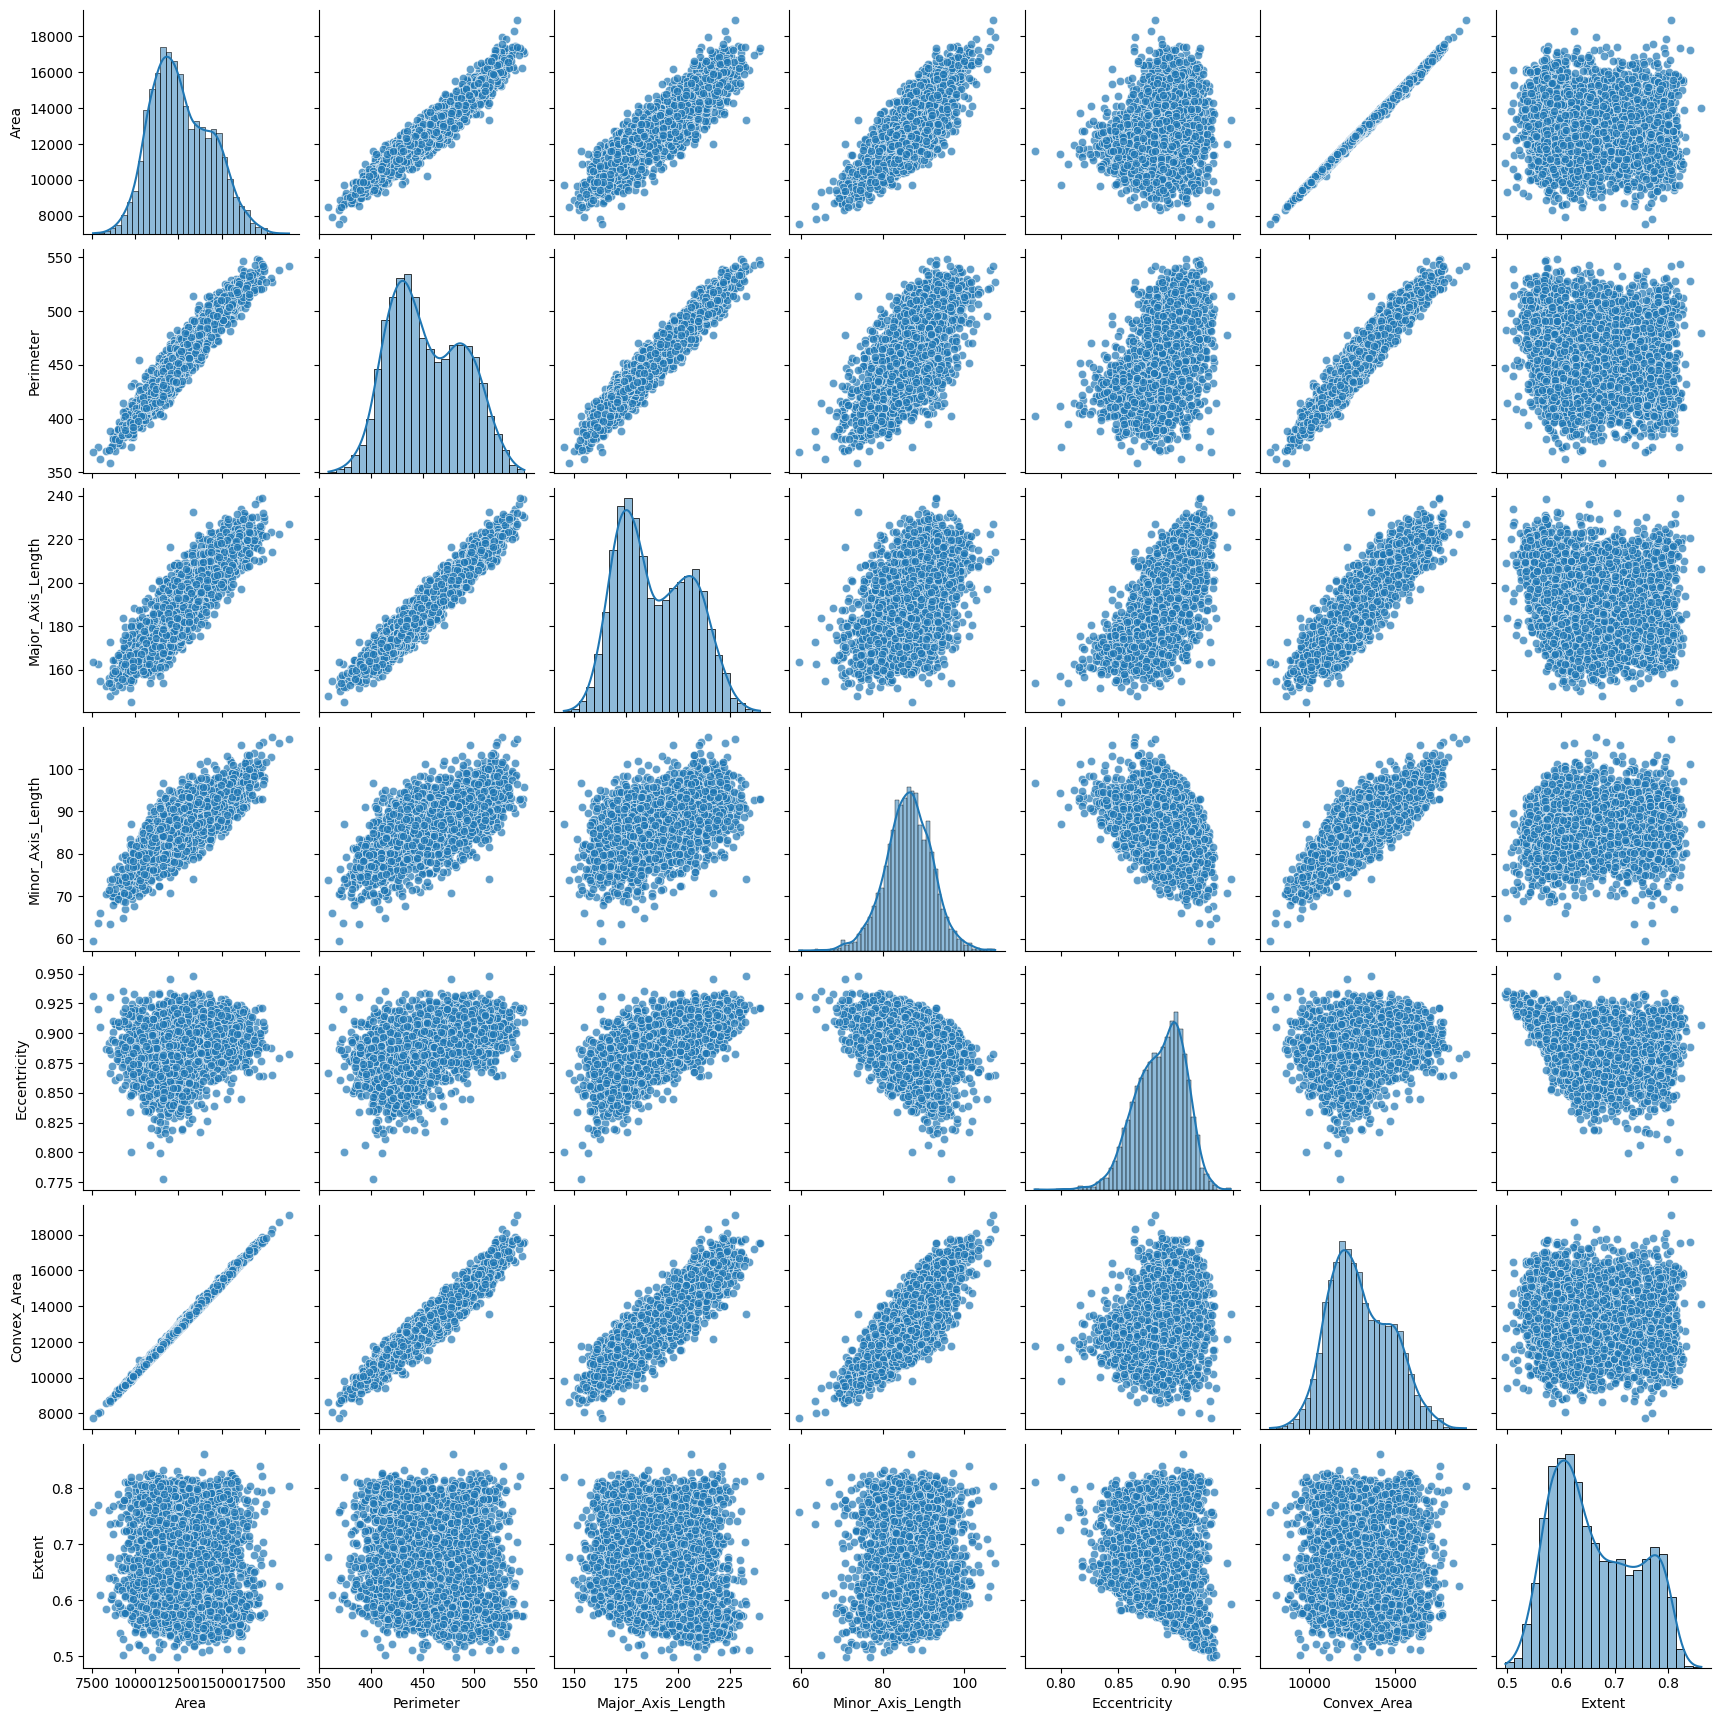

In [44]:
#
#sns.pairplot(data=df_rice)
sns.pairplot(data=df_rice, diag_kind='hist', diag_kws={"kde": True}, plot_kws={"alpha": 0.7})

we suspect that Minor_Axis_Length and Eccentricity might have outliers

## [7] looking for outliers

In [ ]:
# searching in minor_axis_length column the outliers
useful_cols = ['Minor_Axis_Length', 'Eccentricity']

for col in useful_cols:
    Q1 = df_rice[col].quantile(0.25)
    Q3 = df_rice[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_rice[(df_rice[col] < lower_bound) | (df_rice[col] > upper_bound)]

    print(f"\nFeature: {col}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")
    print(f"Outliers count = {len(outliers)}")


Feature: Minor_Axis_Length
Q1 = 82.73, Q3 = 90.14, IQR = 7.41
Lower Bound = 71.61, Upper Bound = 101.26
Outliers count = 65

Feature: Eccentricity
Q1 = 0.87, Q3 = 0.90, IQR = 0.03
Lower Bound = 0.83, Upper Bound = 0.95
Outliers count = 21
